In [2]:
import pandas as pd
benin = pd.read_csv('../data/benin_cleaned.csv')
togo = pd.read_csv('../data/togo_cleaned.csv')
sierra_leone = pd.read_csv('../data/sierraleone_cleaned.csv')

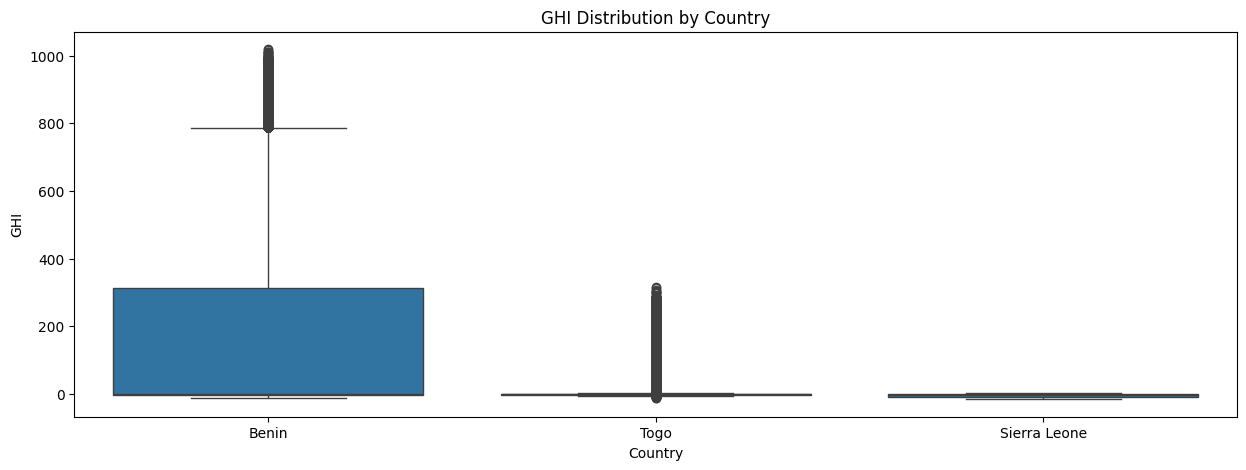

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra_leone['Country'] = 'Sierra Leone'

df_all = pd.concat([benin, togo, sierra_leone])

plt.figure(figsize=(15,5))
sns.boxplot(x='Country', y='GHI', data=df_all)
plt.title("GHI Distribution by Country")
plt.show()

In [4]:
summary = df_all.groupby('Country')[['GHI','DNI','DHI']].agg(['mean','median','std'])
print(summary)

                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         177.311831   -1.1  274.809082  121.254675   -0.2  215.812136   
Sierra Leone   -4.913941   -2.6    4.337824   -0.255923   -0.2    0.173921   
Togo           16.456470   -1.9   46.104802   10.199497    0.0   44.497573   

                    DHI                     
                   mean median         std  
Country                                     
Benin         94.807341   -1.0  143.824496  
Sierra Leone  -5.138640   -3.8    4.054071  
Togo          15.518560    0.0   37.672901  


In [6]:
from scipy.stats import f_oneway, kruskal

# ANOVA for GHI
f_stat, p_val = f_oneway(benin['GHI'], togo['GHI'], sierra_leone['GHI'])
print(f"ANOVA test for GHI: F={f_stat:.2f}, p={p_val:.4f}")

ANOVA test for GHI: F=106052.18, p=0.0000


In [8]:
stat, p_val = kruskal(
    benin["GHI"].dropna(),
    sierra_leone["GHI"].dropna(),
    togo["GHI"].dropna()
)

print("Kruskal-Wallis Test on GHI")
print("H-statistic:", stat)
print("p-value:", p_val)

Kruskal-Wallis Test on GHI
H-statistic: 138335.89874701388
p-value: 0.0


 Key Observations

1. Benin exhibits the highest solar potential across all metrics (GHI, DNI, DHI), with significantly higher means and standard deviations. This indicates both strong solar irradiance and variability, making it a promising location but possibly with fluctuating solar conditions.

2. Sierra Leone has the lowest solar radiation values, with negative mean values for GHI and DHI. These results suggest possible data issues or heavily clouded conditions, making it the least favorable for solar energy among the three countries.

3. Togo displays relatively stable solar metrics, with moderate mean values and low-to-moderate standard deviations, especially for GHI and DHI. This could indicate consistent, though not extreme, solar potential — making it a reliable but less intense solar resource compared to Benin.